# Thư viện Seaborn

Import các thư viện cần thiết:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In ra tên các tập dữ liệu có sẵn của seaborn:

In [ ]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


Chọn một tập dữ liệu có sẵn và lưu vào biến:

In [2]:
tips_df = sns.load_dataset("tips")

Xem qua dữ liệu:

In [ ]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Styling seaborn theme:

In [ ]:
sns.set_theme() # return default theme

Distrubution plot:

* histogram:

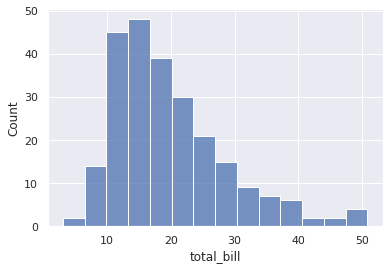

In [ ]:
sns.histplot(data = tips_df["total_bill"]);

* KDE plot:

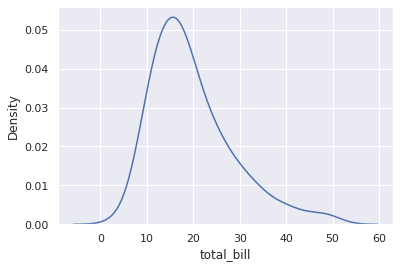

In [ ]:
sns.kdeplot(data = tips_df["total_bill"]);

* Displot: Sự kết hợp của histogram và kde, tuy nhiên có nhiều chức năng hơn:

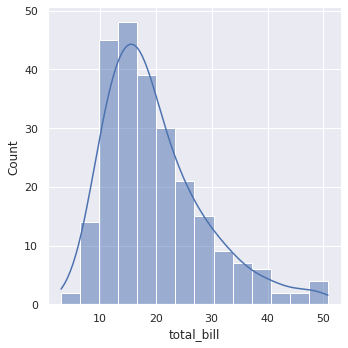

In [ ]:
sns.displot(data = tips_df, x = "total_bill", kde = True);

Báy giờ chúng ta quan tâm time khác nhau thì histogram thay đổi như nào:

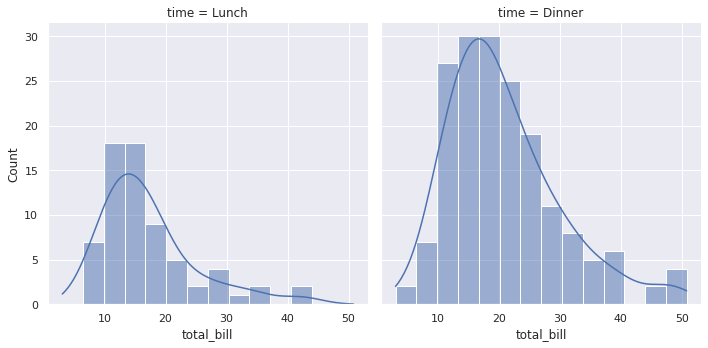

In [ ]:
sns.displot(data = tips_df, x = "total_bill",col = "time" ,kde = True);

Bar plot: Trung bình nam, nữ ai trả tiền tip nhiều hơn:

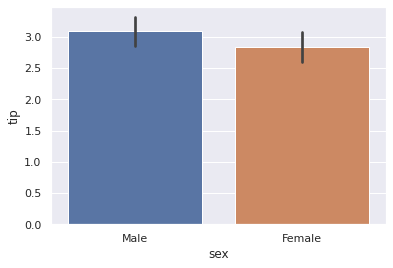

In [ ]:
sns.barplot(data = tips_df, x = "sex",y = "tip" ,estimator = np.mean);

-> Kết luận: Nam hảo phóng hơn nữ :))

Count plot:

Trước tiên bạn có thể dùng hàm value_count:

In [ ]:
tips_df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

Hoặc bạn có thể trực quan hóa như sau:

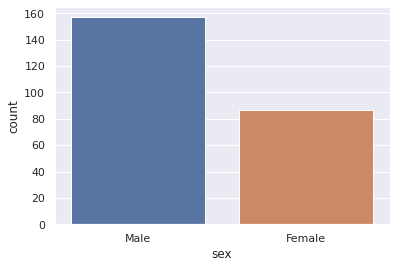

In [ ]:
sns.countplot(data = tips_df, x = "sex");

Box plot: Phân phối tổng bill theo từng ngày:

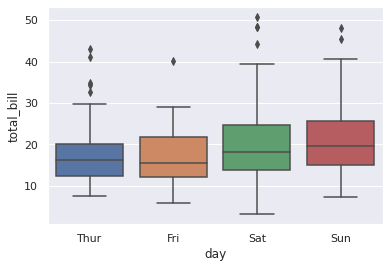

In [ ]:
sns.boxplot(data = tips_df,x = "day", y = "total_bill");

Nếu bạn quan tâm đến việc tổng bill nam và nữ riêng:

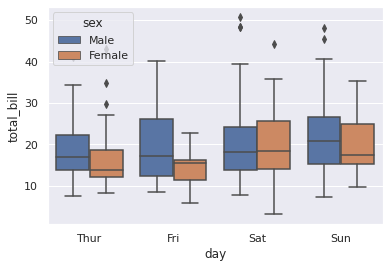

In [ ]:
sns.boxplot(data = tips_df,x = "day", y = "total_bill", hue = "sex");

Muốn thay đổi bảng màu:

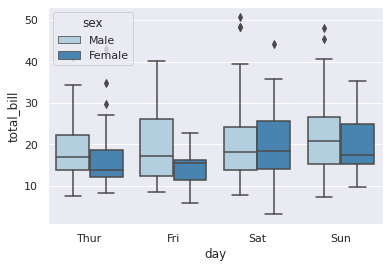

In [ ]:
sns.boxplot(data = tips_df,x = "day", y = "total_bill", hue = "sex", palette = "Blues");

Nếu bạn ko muốn hiện từ "sex":

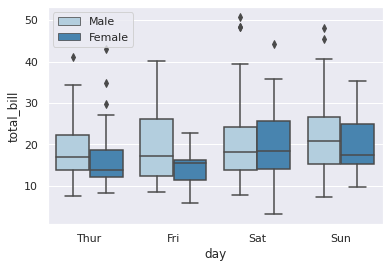

In [ ]:
sns.boxplot(data = tips_df,x = "day", y = "total_bill", hue = "sex", palette = "Blues");
plt.legend(loc = 0);

Facet Grid: Mối tương quan giữa nhiều biến (thay vì hai biến như thông thường)

In [ ]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


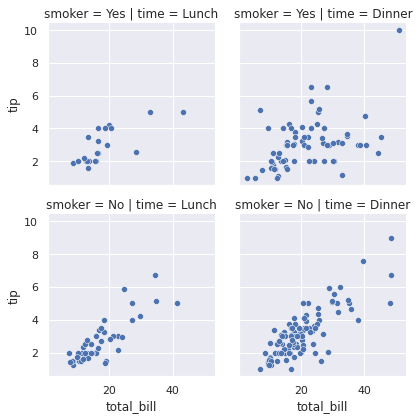

In [ ]:
tips_fg = sns.FacetGrid(data = tips_df, row = "smoker", col = "time");
tips_fg.map(sns.scatterplot, "total_bill", "tip");

--> kết luận: Tổng bill càng lớn thì tiền tip càng lớn và một số thứ khác ✌

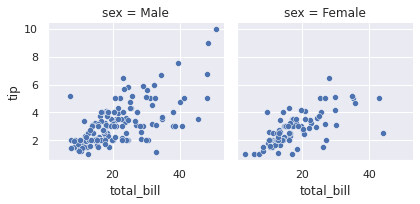

In [ ]:
tips_fg = sns.FacetGrid(data = tips_df, col = "sex");
tips_fg.map(sns.scatterplot, "total_bill", "tip");

Muốn lady first:

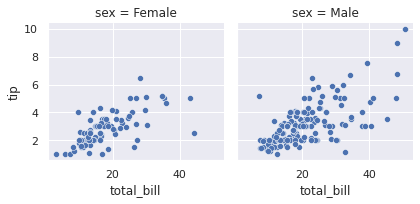

In [ ]:
tips_fg = sns.FacetGrid(
    data = tips_df, 
    col = "sex",
    col_order = ["Female", "Male"]);
tips_fg.map(sns.scatterplot, "total_bill", "tip");

Giờ mình muốn trong những người trong đó ai là người hút thuốc:

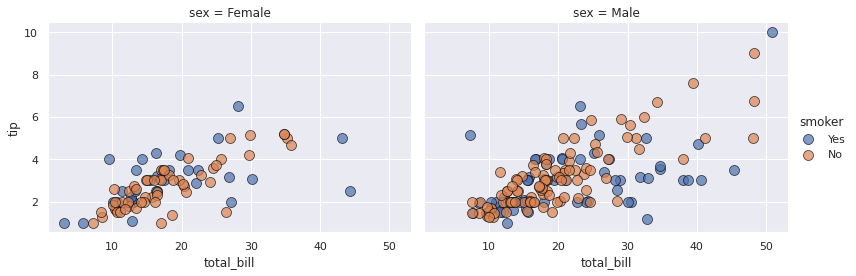

In [ ]:
tips_fg = sns.FacetGrid(
    data = tips_df, 
    col = "sex",
    col_order = ["Female", "Male"],
    hue = "smoker",
    height = 4,
    aspect = 1.4);
# height: chiều cao của biểu đồ
# aspect: chiều ngang của biểu đồ
# col_order: thứ tự cột trong grid
# s = 100: size của element trong biểu đồ
# edgecolor: màu đường viền của element
# alpha: độ mờ của element
tips_fg.map(sns.scatterplot, "total_bill", "tip", s = 100, edgecolor = 'black',
            alpha = 0.7);

# Add legend
tips_fg.add_legend();

Hoặc chúng ta có thể dùng dictionary argument như sau:

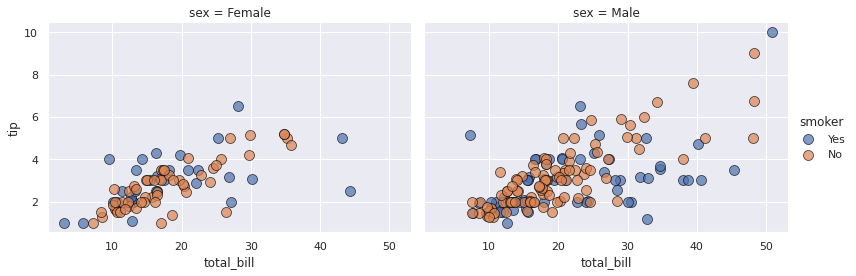

In [ ]:
kws = dict(s = 100, edgecolor = 'black', alpha = 0.7)
tips_fg = sns.FacetGrid(
    data = tips_df, 
    col = "sex",
    col_order = ["Female", "Male"],
    hue = "smoker",
    height = 4,
    aspect = 1.4);
tips_fg.map(sns.scatterplot, "total_bill", "tip", **kws);

# Add legend
tips_fg.add_legend();

Join plot:

Ta dùng một dataset có sẵn khác:

In [4]:
penguins_df = sns.load_dataset("penguins")

In [5]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Ta tiến hành vẽ joint plot giữa cánh và mỏ của chim cánh cụt:

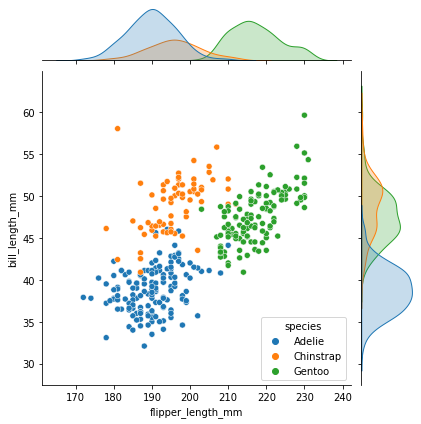

In [10]:
sns.jointplot(data = penguins_df, 
             x = "flipper_length_mm",
             y = "bill_length_mm",
             hue = "species");

Pair Plot: bắt cặp từng biến để ra các biểu đồ thay vì ta vẽ từng cái
* Tìm hiểu sự liên quan giữa các biến một cách nhanh chóng hơn.
* Lưu ý: Nó chỉ bắt cặp những dữ liệu định lượng.

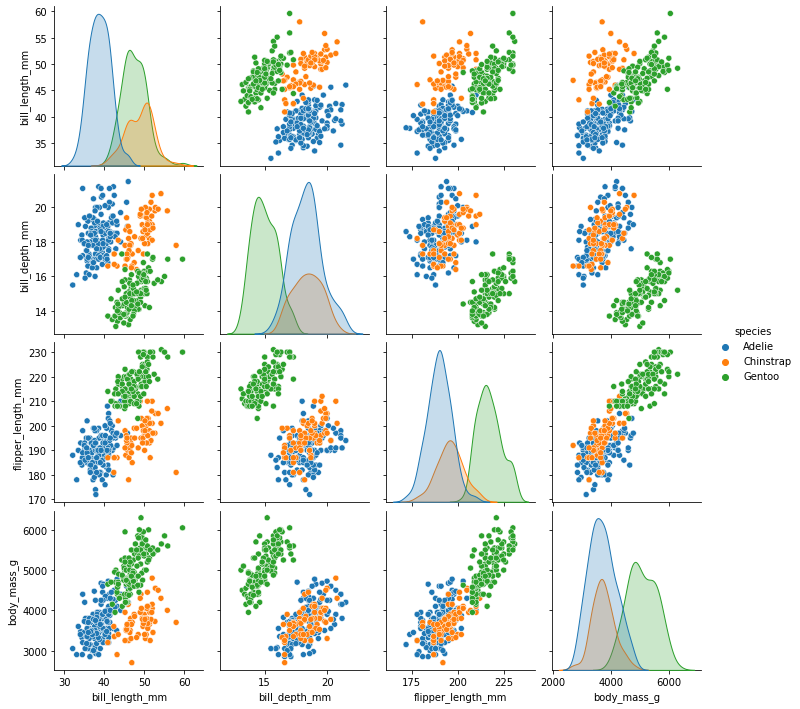

In [11]:
sns.pairplot(data = penguins_df, hue = "species"); # hue chia thành từng loại cho dễ phân biệt

Heat map: Biểu đồ nhiệt

In [12]:
flights_df = sns.load_dataset("flights")

In [14]:
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Chuyển dữ liệu thành dạng pivot_table:

In [24]:
flights = pd.pivot_table(data = flights_df, index = "month", columns = "year", values = "passengers");
# index: hàng
# columns: cột
# values: giá trị giao giữa hàng và cột

Kiểm tra dữ liệu:

In [23]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


Vẽ biểu đồ heatmap:

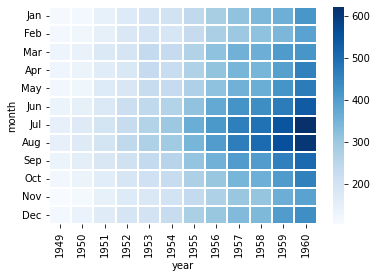

In [27]:
sns.heatmap(data = flights, cmap = "Blues", linecolor = "white", linewidth = 1);
# cmap: chỉnh màu
# linecolor: chỉnh màu đường phân chia
# linewidth: độ dày đường phân chia